In [ ]:
!pip install ipython-autotime

In [ ]:
!pip install bing-image-downloader

In [ ]:
!pip install scikit-image

In [1]:
%load_ext autotime

time: 0 ns (started: 2021-10-30 21:34:30 +05:30)


In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download('pretty sunflower',limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('rugby ball lather',limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('ice cream cone',limit=30,output_dir='images',adult_filter_off=True)

In [4]:
# Preprocessing
# Resize
# Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 36.1 s (started: 2021-10-30 21:45:40 +05:30)


In [6]:
target=[]
images=[]
flat_data=[]

time: 0 ns (started: 2021-10-30 21:49:19 +05:30)


In [22]:
DATADIR='images'
CATEGORIES= ['pretty sunflower', 'rugby ball leather', 'ice cream cone']

time: 0 ns (started: 2021-10-30 22:03:44 +05:30)


In [29]:
for category in CATEGORIES:
    class_num= CATEGORIES.index(category) #label encoding
    path= os.path.join(DATADIR,category)
    
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        #print(img_array.shape)
        #plt.imshow(img_array)
        img_resized=resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

time: 26.2 s (started: 2021-10-30 22:14:24 +05:30)


In [31]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 0 ns (started: 2021-10-30 22:16:03 +05:30)


<BarContainer object of 3 artists>

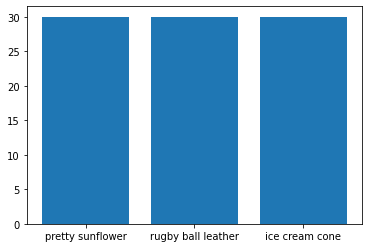

time: 94 ms (started: 2021-10-30 22:17:16 +05:30)


In [32]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [33]:
# Splitting data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(flat_data,target,test_size=0.3,random_state=0)

time: 10.5 s (started: 2021-10-30 22:19:33 +05:30)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid= [
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
            
]

svc=svm.SVC(probability=True)
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 34.5 s (started: 2021-10-30 22:26:56 +05:30)


In [35]:
y_pred=clf.predict(x_test)

time: 31 ms (started: 2021-10-30 22:28:33 +05:30)


In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 0 ns (started: 2021-10-30 22:28:59 +05:30)


In [37]:
accuracy_score(y_pred,y_test)

0.9629629629629629

time: 0 ns (started: 2021-10-30 22:29:29 +05:30)


In [39]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  1],
       [ 0, 10,  0],
       [ 0,  0,  7]], dtype=int64)

time: 0 ns (started: 2021-10-30 22:30:01 +05:30)


In [41]:
# Saving model using pickle
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 31 ms (started: 2021-10-30 22:33:01 +05:30)


In [43]:
model= pickle.load(open('img_model.p','rb'))

time: 0 ns (started: 2021-10-30 22:37:55 +05:30)


Enter urlhttps://5.imimg.com/data5/SD/SM/AC/ANDROID-45448310/product-jpeg-500x500.jpg
(500, 500, 3)
Predicted output : ice cream cone


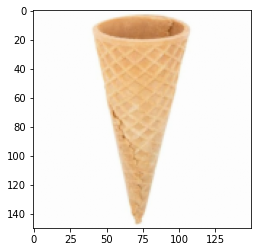

time: 3.75 s (started: 2021-10-30 22:44:33 +05:30)


In [45]:
# Testing a new image
flat_data=[]
url= input('Enter url')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]

print(f'Predicted output : {y_out}')

In [46]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13451 sha256=bc4eca932d136acf180f737690fd5624ba28ab830d039c937e80687d00316d3d
  Stored in directory: c:\users\bazzz\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker


  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=18990 sha256=4c09521adacf80293d0c6abeea90b3b4643ccad70b03ff7e25984d7c4274feea
  Stored in directory: c:\users\bazzz\appdata\local\pip\cache\wheels\87\a1\e7\66d10d257852cd702f8e56be9aa70e74d8ac90f8d951eaa984
Successfully built pyngrok
time: 39 s (started: 2021-10-30 22:47:38 +05:30)


In [47]:
# Deployment options
# 1. WebPage - HTML,CSS,JSS,Django
# 2. WebApp - Streamlit/ Dash
# 3. Mobile App - Kotlin/Java

time: 0 ns (started: 2021-10-30 22:52:41 +05:30)


In [2]:
%%writefile app.py
import streamlit as st
st.title("Image Classifier")


Overwriting app.py


In [3]:
!nohup streamlit run app.py &

url= ngrok.connect(port='8501')
url

OSError: Background processes not supported.